# Music Converter Notebook

CSI4106 Artificial Intelligence   
Prepared by:

#### Introduction:
We start our project by first demonstrating with detailed notes how to decompose 1 song into features. Once this is complete, we will create a method which will repeat the process for 1000 songs.

This song is 30 seconds long.
The sampling rate of this file is: 22050. It represents how many times per second the audio is sampled.
The value "x" represents the wave form of a song, which contains 661504 slices.
The approximate duration of the song is: 30.00018140589569. Which is what we expect since all songs are 30 seconds long.
[-0.16915894 -0.021698    0.01956177 ...  0.07662964  0.03872681
 -0.02105713]


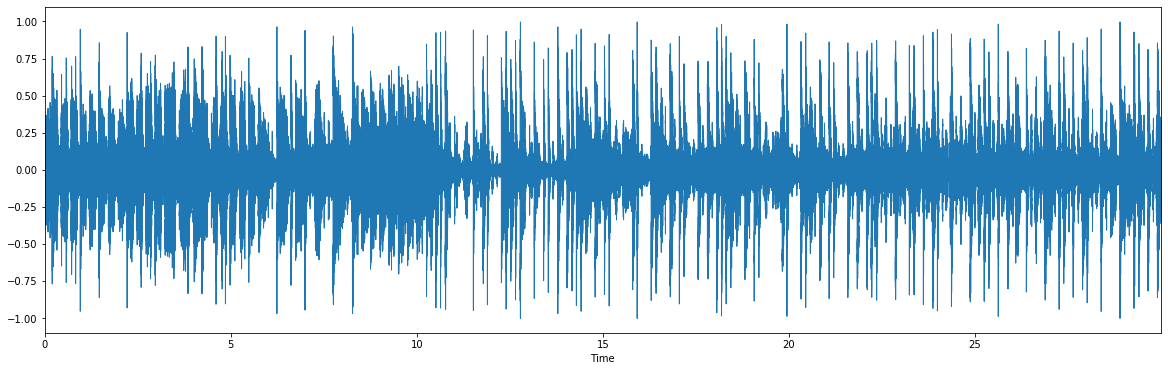

In [280]:
## Decomposing the first song in the Hip Hop folder into features

##### Step 1. Import the song file
import librosa
import matplotlib.pyplot as plt
import librosa.display
import sklearn
from scipy import signal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.collections import PolyCollection
import numpy as np
import csv
import pandas as pd

print("This song is 30 seconds long.")
file_path = '../resources/genres/hiphop/hiphop.00000.wav'

## Load an audio file as a floating point time series.
x , sampling_rate = librosa.load(file_path)


print("The sampling rate of this file is: {0}. It represents how many times ".format(sampling_rate) +
      "per second the audio is sampled.")
print("The value \"x\" represents the wave form of a song, which contains {0} slices.".format(x.shape[0]))
print("The approximate duration of the song is: {0}. Which is what we expect since all songs are 30 seconds long.".format(len(x)/sampling_rate))

## Plot the waveform of the loaded file
plt.figure(figsize=(20, 6))
librosa.display.waveplot(x, sr=sampling_rate)



In [283]:
print(x)
print(x.shape)


[-0.16915894 -0.021698    0.01956177 ...  0.07662964  0.03872681
 -0.02105713]
(661504,)


The following is a 3D representation of the previous spectrogram.


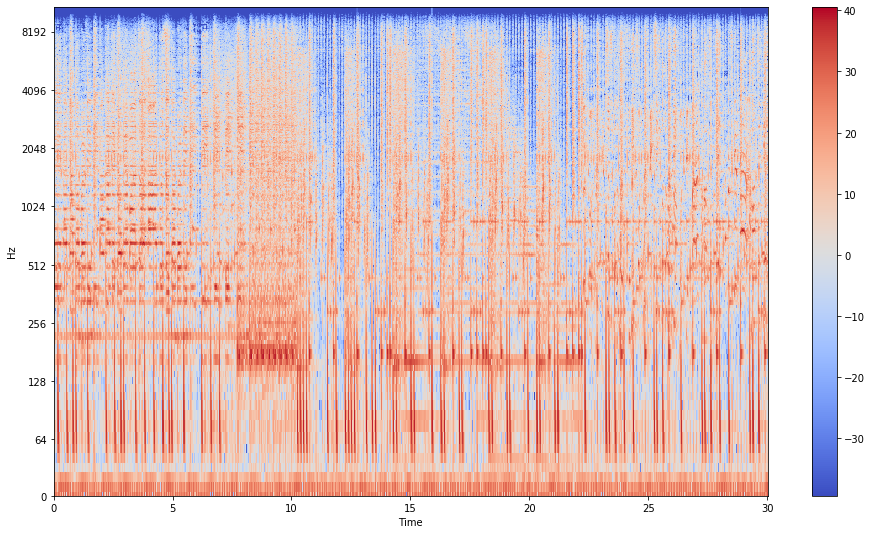

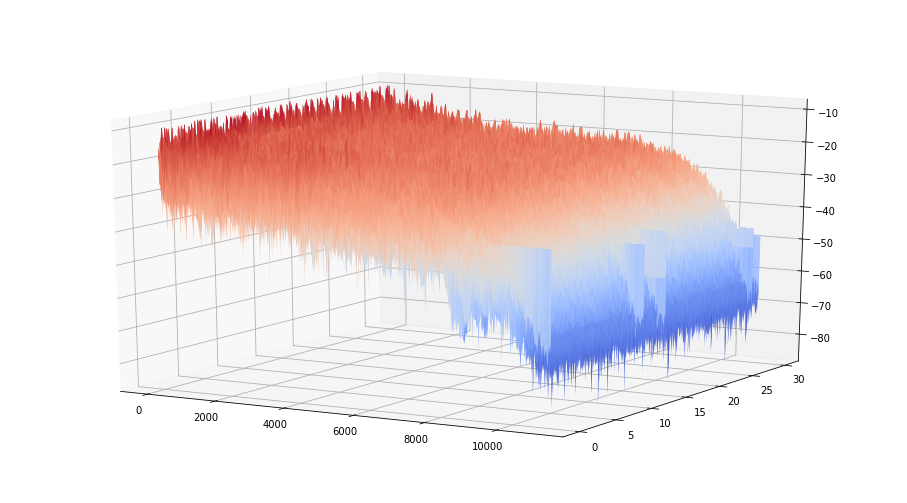

The following is a subset from 0-512Hz of the 3D spectogram.


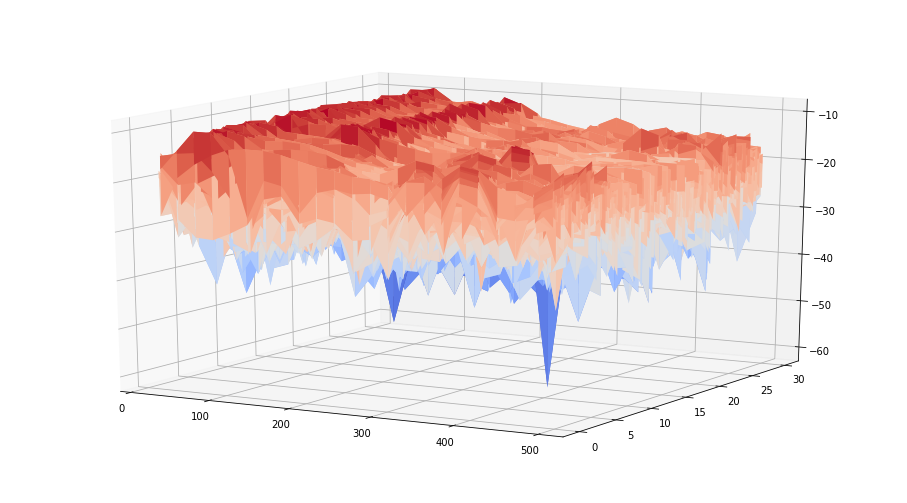

In [278]:
##### Step 2. Apply Short-Time Fourier Transform (STFT) to Decompose Wave Form to base frequencies

## This function converts our file into a time-frequency domain representation using short-time Fourier transform 
## (essentially this is the change of FFT's over time)
wav_form = librosa.stft(x)
S_spectogram, phase_spectogram = librosa.magphase(librosa.stft(y=x))

## Plot the spectrogram of the STFT representation (we explain what this is below)
wav_form_db = librosa.amplitude_to_db(abs(wav_form))
plt.figure(figsize=(16,9))
librosa.display.specshow(wav_form_db, sr=sampling_rate, x_axis='time', y_axis='log')
plt.colorbar()
plt.ion()



##Ploting the 3D represenation spectrogram of the SFTF 
f, t, Zxx = signal.stft(x, sampling_rate, nperseg=1025)
Zxx=abs(Zxx)


fig = plt.figure(figsize=(16,9))
ax = fig.gca(projection='3d')
ax.plot_surface(f[:, None], t[None, :],10.0*np.log10(Zxx),rcount=2046, ccount=2046,cmap = cm.coolwarm)
ax.view_init(15, -60)
print ("The following is a 3D representation of the previous spectrogram.")
plt.show()

##Ploting the 3D represenation spectrogram of the SFTF in the frequence range of 0-512
myfilter = (f>000) & (f<512)
f = f[myfilter]
Zxx = Zxx[myfilter, ...]

fig = plt.figure(figsize=(16,9))
ax = fig.gca(projection='3d')
ax.plot_surface(f[:, None], t[None, :],10.0*np.log10(Zxx),rcount=2046, ccount=2046,cmap = cm.coolwarm)
ax.view_init(15, -60)
print ("The following is a subset from 0-512Hz of the 3D spectogram.")
plt.show()

##TODO:Add titles and axis for all the graphs. 
##Recommend putting spectrogram info before our spectrogram outputs




The STFT breaks down a signal into amplitude over time of each frequency. To demonstrate this more clearly, Figure 1 below shows a 3D spectrogram example from Wikipedia. To explain it more clearly, we'll take an example of a sound recording. The frequency axis represents all the possible frequencies in that recording. The time axis represents different times in the recording. The z or amplitude axis represents the amplitude (or level) of sound.

In the Figure, we can see that the amplitude of the low frequencies is also low. As the frequency gets higher, the amplitude also increases, meaning this recording was of a higher pitched sound.

The above plot represents the same thing as Figure 1 and has the same frequency and time axis. However, instead of a third dimension for amplitude, the above plot uses colour to show higher amplitudes across the 2D plane. 
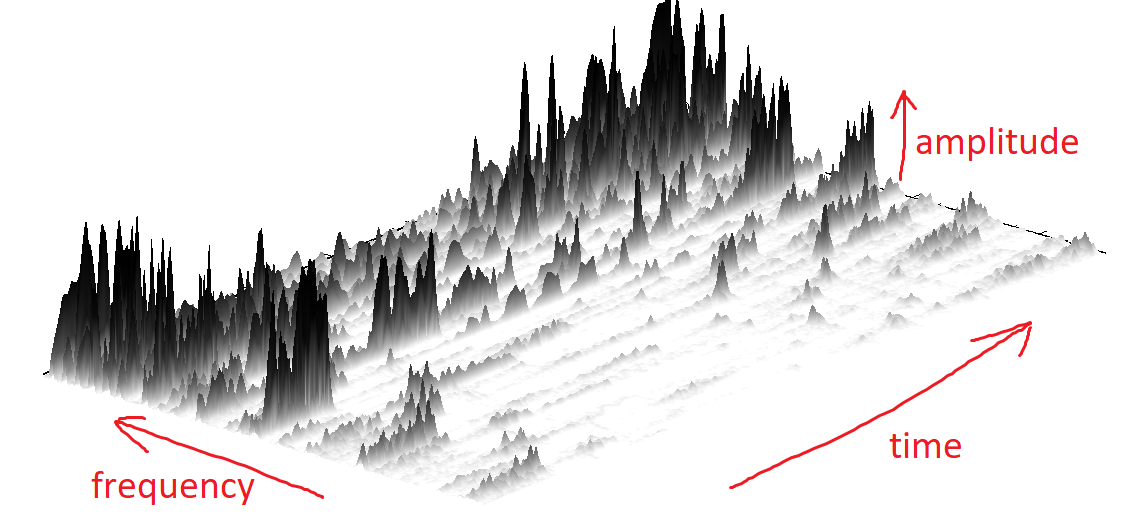
(Figure 1 Source:https://en.wikipedia.org/wiki/Spectrogram?fbclid=IwAR0Pzq_aS1hJtt-eEZxJyE1cZa6pEEKzYQBlhYer8x4CUOvHr_fOPkg89A8#/media/File:Spectrogram.png)

From the image below which represents a small slice of time. The number of crossings 0 is 15 

[False False  True False  True False False False False False  True False
 False False False False False False False  True  True False False False
  True False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False  True False  True False False False False False
  True False False False False False  True False False False  True False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False  True False  True]


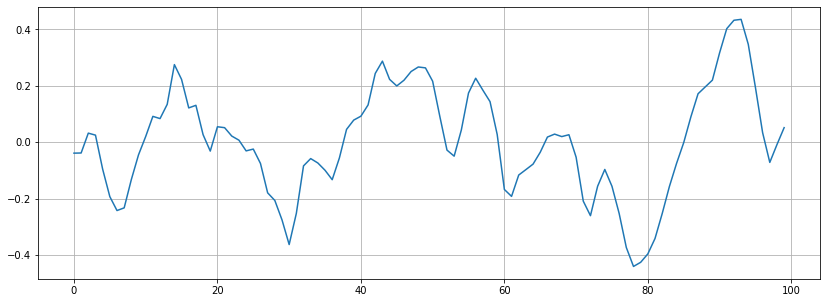

In [279]:
##### Step 3. Use the "wav_form_dB" decomposed song for Feature Extraction

# Feature 1: Zero-Crossing Rate 
## This represents how many times the frequency passes the "0" x-axis in either negative or positive direction
m0 = 10000
m1 = 10100
plt.figure(figsize=(14,5))
plt.plot(x[m0:m1])
plt.grid()
zero_crossing_sample = librosa.zero_crossings(x[m0:m1], pad=False)
print("From the image below which represents a small slice of time. The number of crossings " +
     "0 is {0} \n".format(sum(zero_crossing_sample)))
print (zero_crossing_sample)

In [238]:
# Zero Crossing feature applied to entire song
zero_crossings = librosa.zero_crossings(x)
print("When this idea of zero crossings is extended to the entire 30 second portion of a song, this song has " +
     "{0} zero crossings".format(sum(zero_crossings)))

When this idea of zero crossings is extended to the entire 30 second portion of a song, this song has 97629 zero crossings


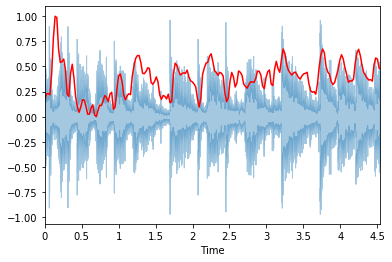

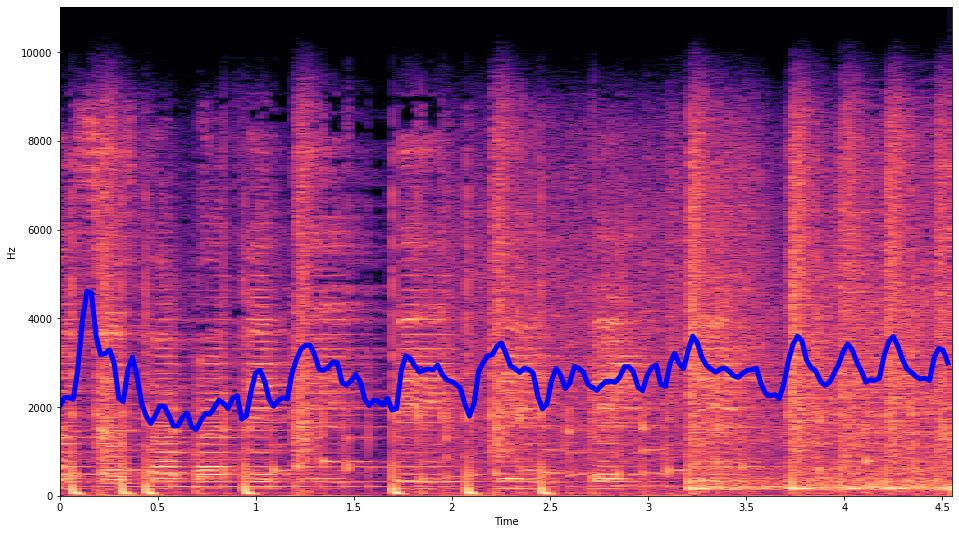

In [239]:
# Feature 2: Spectral Centroid 
## This feature represents taking a "slice" of a song and then taking the average of all frequencies at the
## point in time the slice represents. Extend this idea to ALL slices that make up a song, and
## using these averages plot a line that traverses exactly through each point, this is the Spectral Centroid
## of a song. This is important because two different genres may "generally" have a different spectral centroid line.

# Smaller Sample taken for demonstration below
n0 = 100000
n1 = 200000
x_sample = x[n0:n1]
spectral_centroids_sample = librosa.feature.spectral_centroid(x_sample, sr=sampling_rate)[0]
spectral_centroids_sample.shape

frames = range(len(spectral_centroids_sample))
t = librosa.frames_to_time(frames)

# Normalize
def normalize(x_sample, axis=0):
    return sklearn.preprocessing.minmax_scale(x_sample, axis=axis)

librosa.display.waveplot(x_sample, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_centroids_sample), color='r')

## Alternative representations



##TODO: add appropriate plot titles 

S_sample, phase_sample = librosa.magphase(librosa.stft(y=x_sample))
plt.figure(figsize = (16,9))
librosa.display.specshow(librosa.amplitude_to_db(S_sample, ref=np.max),y_axis='hz', x_axis='time')
plt.plot(t,spectral_centroids_sample, lw = 5.0, color='b')




## TODO: Add comment to describe code above. Change code above slightly also.
## TODO: Add comment describing image below.

In [240]:
# Full song taken as spectral_centroid

spectral_centroids = librosa.feature.spectral_centroid(x, sr=sampling_rate)[0]
print(spectral_centroids.shape)

(1293,)


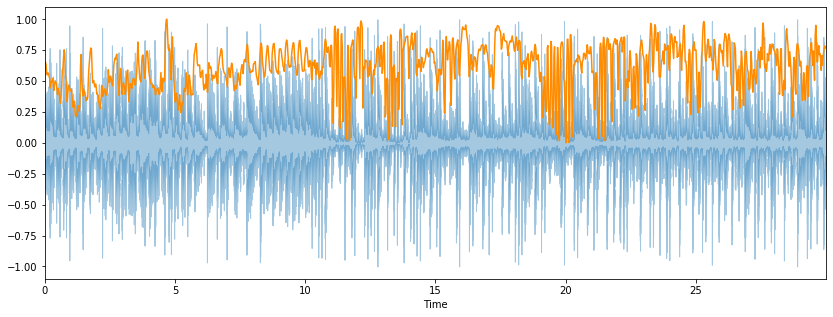

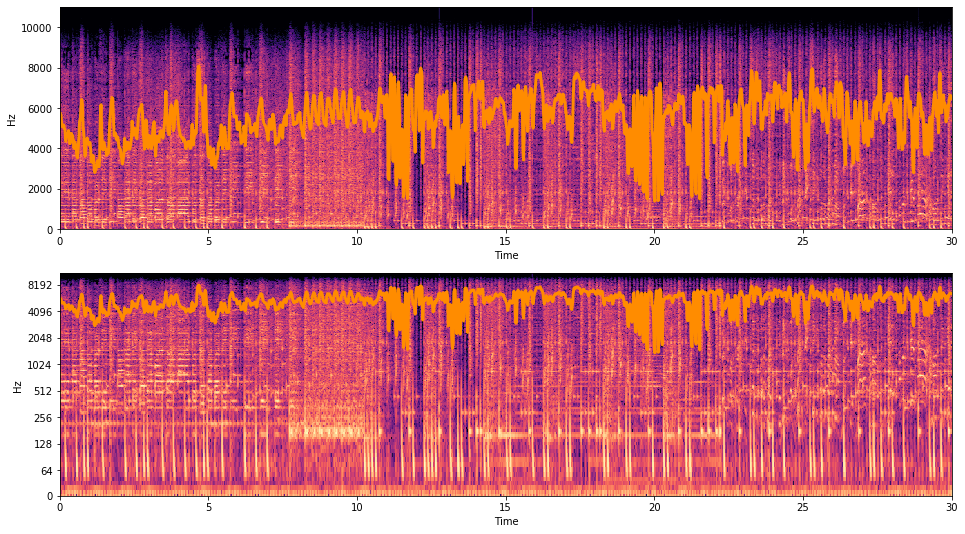

(1293,)


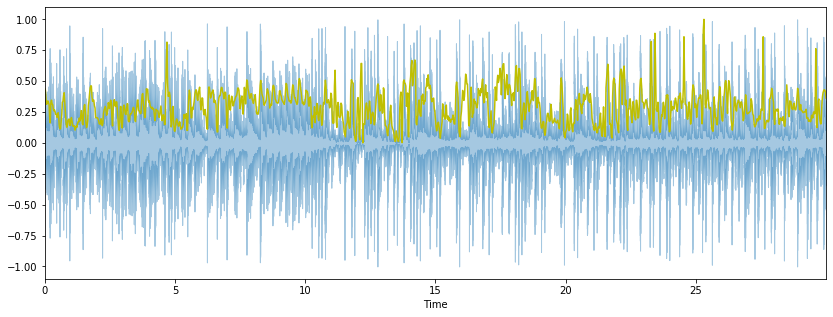

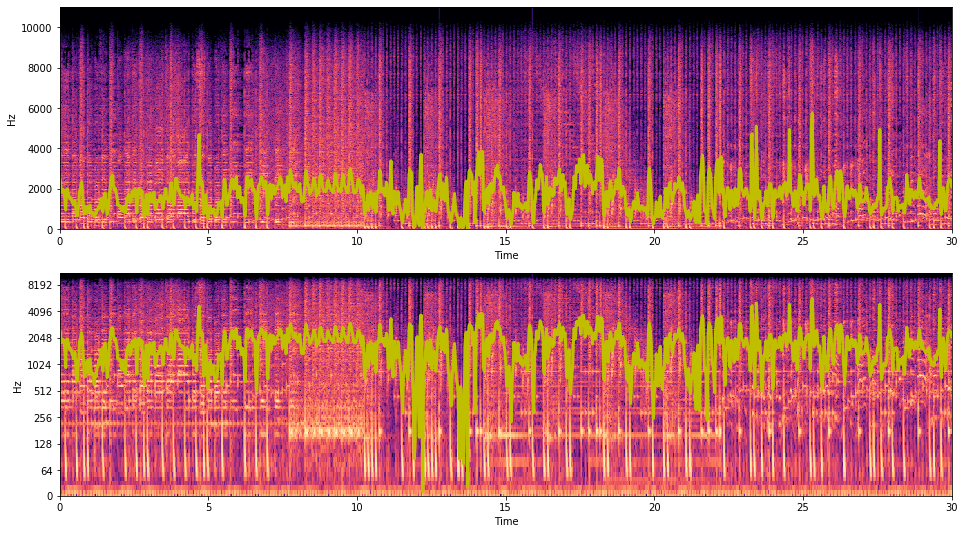

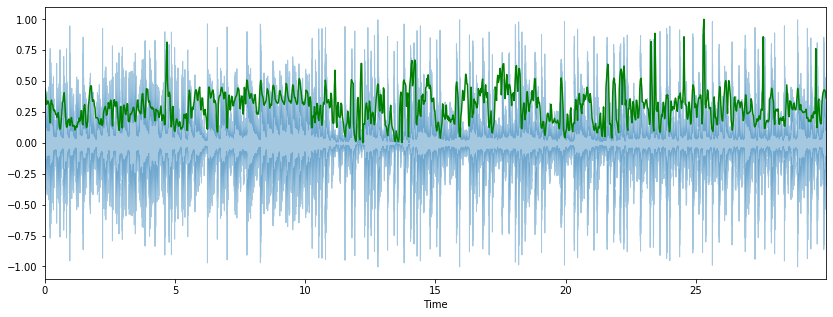

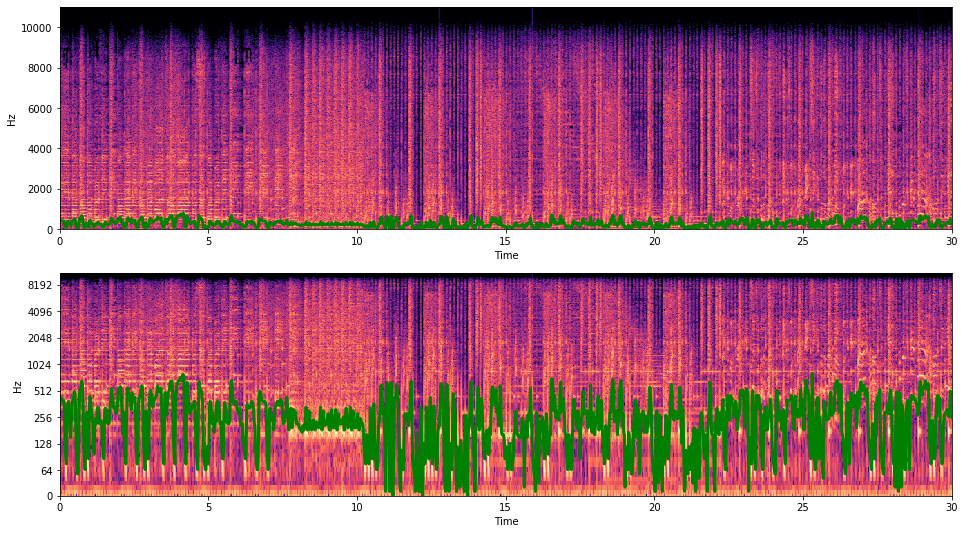

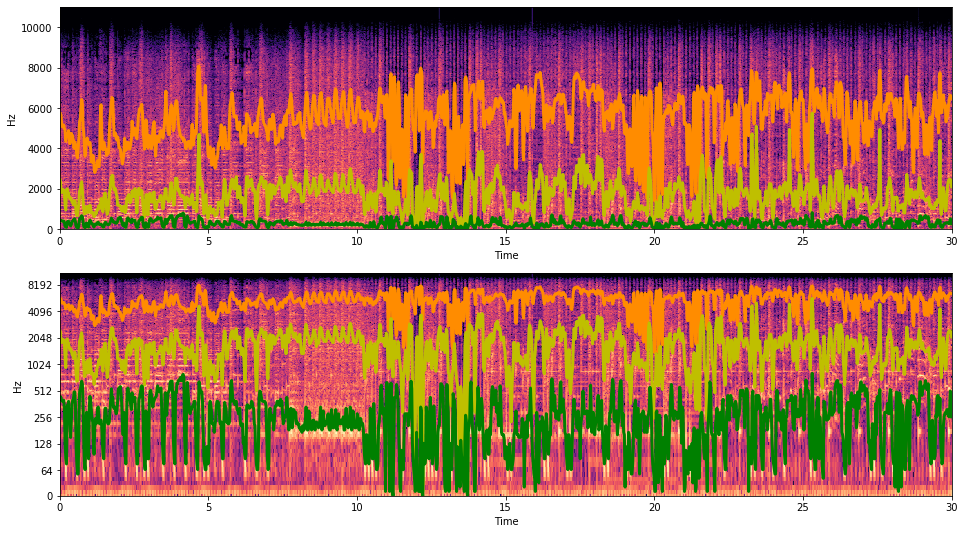

In [241]:
# Feature 3: Spectral Roll-off
### For a single slice the total "Energy" of all frequencies that represent the slice, always equal "100%".
### Spectral Roll-Off takes as many as possible composite frequencies such that the total number of energy is equal
### to some user-defined spectral roll-off percentage, for example, 85%. It adds these composite frequencies in order of
### highest frequencies in terms of Hz, to lower frequencies. This approach is applied to the entire song at each slice
### which ends up creating a series of points on a graph that are joined together by a line passing directly through all
### points to create the Spectral Roll-off.



# Smaller Sample taken for demonstration below
## Spectral Roll Percent at 85% 



spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sampling_rate, roll_percent=0.85)[0]

frames = range(len(spectral_rolloff))
t = librosa.frames_to_time(frames)

plt.figure(figsize=(14,5))
librosa.display.waveplot(x, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='darkorange')


plt.figure(figsize = (16,9))
plt.subplot(2,1,1)
librosa.display.specshow(librosa.amplitude_to_db(S_spectogram, ref=np.max),y_axis='hz', x_axis='time')
plt.plot(t,spectral_rolloff, color='darkorange', lw=3)
plt.subplot(2,1,2)
librosa.display.specshow(librosa.amplitude_to_db(S_spectogram, ref=np.max),y_axis='log', x_axis='time')
plt.plot(t,spectral_rolloff, color='darkorange', lw=3)
plt.show()



print(spectral_rolloff.shape)

## Spectral Roll Percent at 45%
spectral_rolloff_2= librosa.feature.spectral_rolloff(x+0.01, sr=sampling_rate, roll_percent=0.45)[0]
plt.figure(figsize=(14,5))
librosa.display.waveplot(x, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff_2), color='y')

plt.figure(figsize = (16,9))
plt.subplot(2,1,1)
librosa.display.specshow(librosa.amplitude_to_db(S_spectogram, ref=np.max),y_axis='hz', x_axis='time')
plt.plot(t,spectral_rolloff_2, color='y', lw=3)
plt.subplot(2,1,2)
librosa.display.specshow(librosa.amplitude_to_db(S_spectogram, ref=np.max),y_axis='log', x_axis='time')
plt.plot(t,spectral_rolloff_2, color='y', lw=3)
plt.show()

## Spectral Roll Percent at 10%
spectral_rolloff_3= librosa.feature.spectral_rolloff(x+0.01, sr=sampling_rate, roll_percent=0.1)[0]
plt.figure(figsize=(14,5))
librosa.display.waveplot(x, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff_2), color='g')

plt.figure(figsize = (16,9))
plt.subplot(2,1,1)
librosa.display.specshow(librosa.amplitude_to_db(S_spectogram, ref=np.max),y_axis='hz', x_axis='time')
plt.plot(t,spectral_rolloff_3, color='g', lw=3)
plt.subplot(2,1,2)
librosa.display.specshow(librosa.amplitude_to_db(S_spectogram, ref=np.max),y_axis='log', x_axis='time')
plt.plot(t,spectral_rolloff_3, color='g', lw=3)
plt.show()

#Plotting the 3 different rolloffs percentages on the same graph both on a linear hz scale and a log hz scale
plt.figure(figsize = (16,9))
plt.subplot(2,1,1)
librosa.display.specshow(librosa.amplitude_to_db(S_spectogram, ref=np.max),y_axis='hz', x_axis='time')
plt.plot(t,spectral_rolloff, color='darkorange', lw=3)
plt.plot(t,spectral_rolloff_2, color='y', lw=3)
plt.plot(t,spectral_rolloff_3, color='g', lw=3)
plt.subplot(2,1,2)
librosa.display.specshow(librosa.amplitude_to_db(S_spectogram, ref=np.max),y_axis='log', x_axis='time')
plt.plot(t,spectral_rolloff, color='darkorange', lw=3)
plt.plot(t,spectral_rolloff_2, color='y', lw=3)
plt.plot(t,spectral_rolloff_3, color='g', lw=3)
plt.show()
##TODO: Explain difference in the 3 graphs and add labels and axis 

##TODO: Add spectral reprisentation to the roll off frequency as an alternative data visualization IOT synch with feature 2 
## and to add extra from the DS post. 

(20, 1293)


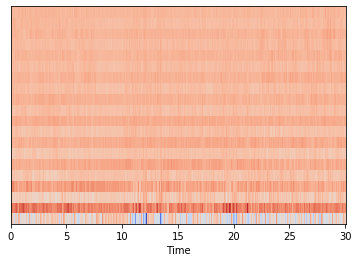

In [242]:
# Feature 4: Mel-Frequency Cepstral Coefficients (MFCC)
## This feature represents: This feature is a way to represent human auditory sounds

mfccs = librosa.feature.mfcc(x, sr=sampling_rate)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')

[1.         1.         0.61563295 ... 0.22704238 0.4528946  0.2900715 ]


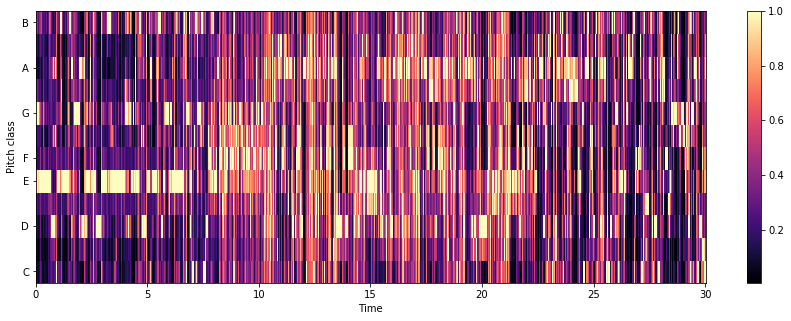

In [246]:
# Feature 5: Chroma Frequencies
## This feature represents: This will will divide the spectrum in to 12 distinct semitones that represent that
## represent a musical octave, for the entire song.

chromagram = librosa.feature.chroma_stft(x, sr=sampling_rate )
plt.figure(figsize=(15,5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma')
plt.colorbar()



In [269]:
##Creating CSV File Header

def csvCreator (file_name):
    header_elements =["filename ", "spectral_centroid ",  "rolloff ", "zero_crossing_rate"]
    pitch = ["c", "c#", "d", "d#","e", "f", "f#", "g", "g#", "a", "a#", "b"]
    header=''
    for l in range (1, 21):
        header_elements.append(f' mfcc{l}')
    for i in range (1,13):
        header_elements.append(f"chroma_pitch_{pitch[i-1]}") 
    header_elements.append('genre')
    file = open(file_name,'w', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(header_elements)


##CSV Appendor Method for adding the extrated music feautres to the CSV File   
def csvAppendor (csvFile, zcr, spectral_centroids, spectral_rolloff, mfccs, chroma, song_file_path, genre):
    to_append =f'{song_file_path} {np.mean(spectral_centroids)} {np.mean(spectral_rolloff)} {sum(zcr)}'   
    for e in mfccs:
        to_append += f' {np.mean(e)}'
    for h in chroma:
        to_append += f' {np.mean(h)}'
    to_append += " "
    to_append += genre
    file = open(csvFile, 'a', newline='')  
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())



##Feature Extraction Method

def featureExtractor (songFilePath, startTime, duration,rollPercent):
    x , sampling_rate = librosa.load(songFilePath, offset= startTime, duration=duration)
    zcr = librosa.zero_crossings(x)
    spectral_centroids = librosa.feature.spectral_centroid(x, sr=sampling_rate)[0]
    spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sampling_rate, roll_percent=rollPercent)[0]
    mfccs = librosa.feature.mfcc(x, sr=sampling_rate)
    chroma = librosa.feature.chroma_stft(x, sr=sampling_rate)
    
    return zcr, spectral_centroids, spectral_rolloff, mfccs, chroma


##Extracting Features From All Songs

csvCreator('feature_extraction_5sec.csv')
csvCreator('feature_extraction_10sec.csv')
csvCreator('feature_extraction_20sec.csv')


genres = ["blues","classical","country","disco","hiphop","jazz","metal","pop","reggae","rock"]

file_path_b='../resources/genres/'

for x in genres:
    file_path_g= file_path_b + x +'/'+x +'.000'

    for y in range(0, 100):
        y_string = str(y)
        file_path_s = file_path_g + y_string.rjust(2,'0') + '.wav'
        
        #extracting feature from 5 seconds
        ##zcr, spectral_centroids, spectral_rolloff, mfccs, chroma = featureExtractor(file_path_s, 12.5,5,0.85)
        ##csvAppendor('feature_extraction_5sec.csv',zcr, spectral_centroids, spectral_rolloff, mfccs, chroma, file_path_s[file_path_s.rfind('/')+1:], x)
         #extracting feature from 10 seconds
        ##zcr, spectral_centroids, spectral_rolloff, mfccs, chroma = featureExtractor(file_path_s, 10,10,0.85)
        ##csvAppendor('feature_extraction_10sec.csv',zcr, spectral_centroids, spectral_rolloff, mfccs, chroma, file_path_s[file_path_s.rfind('/')+1:], x)
         #extracting feature from 10 seconds
        #zcr, spectral_centroids, spectral_rolloff, mfccs, chroma = featureExtractor(file_path_s, 5,20,0.85)
        #csvAppendor('feature_extraction_20sec.csv',zcr, spectral_centroids, spectral_rolloff, mfccs, chroma, file_path_s[file_path_s.rfind('/')+1:], x)
        print (y)
        





filename   spectral_centroid      rolloff   zero_crossing_rate  \
0  blues.00000.wav         1789.691305  3860.875842               34678   
1  blues.00001.wav         1587.834763  3597.905970               26769   
2  blues.00002.wav         1513.709636  2947.750621               32597   
3  blues.00003.wav         1127.070424  2283.930930               15822   
4  blues.00004.wav         1806.542344  3491.513961               42958   

        mfcc1       mfcc2      mfcc3      mfcc4      mfcc5      mfcc6  ...  \
0 -111.741592  120.942429 -16.224609  42.216919  -8.492074  18.812418  ...   
1 -203.713547  124.664024   7.031563  34.466129   2.258640  21.462074  ...   
2  -92.690536  145.266617 -31.361727  33.672020 -16.014963  26.366978  ...   
3 -194.412201  148.849045   4.209909  26.602324  -0.594447  15.002495  ...   
4 -166.273422  130.358246 -38.427925  24.317339 -34.526878  13.233776  ...   

   chroma_pitch_d#  chroma_pitch_e  chroma_pitch_f  chroma_pitch_f#  \
0         0.248136        0.243862        0.330048         0.346097   
1         0.218205        0.225902        0.356725         0.436854   
2         0.397011        0.562303        0.329151         0.306164   
3         0.529437        0.650645        0.518327         0.372649   
4         0.233383        0.255266        0.570287         0.203594   

   chroma_pitch_g  chroma_pitch_g#  chroma_pitch_a  chroma_pitch_a#  \
0        0.444321         0.311950        0.315551         0.440264   
1        0.596992         0.387052        0.255115         0.265569   
2        0.280005         0.316763        0.375631         0.384641   
3        0.252796         0.250761        0.321668         0.317371   
4        0.177721         0.279120        0.359339         0.585864   

   chroma_pitch_b  genre  
0        0.372185  blues  
1        0.285919  blues  
2        0.605593  blues  
3        0.395007  blues  
4        0.234086  blues  

[5 rows x 37 columns]

filename   spectral_centroid      rolloff   zero_crossing_rate  \
0  blues.00000.wav         1839.641670  3953.685506                9321   
1  blues.00001.wav         1686.911882  4023.967489                6063   
2  blues.00002.wav         1593.981586  3148.483276                8692   
3  blues.00003.wav         1246.514926  2664.634196                4622   
4  blues.00004.wav         1941.228943  3848.711141               11987   

        mfcc1       mfcc2      mfcc3      mfcc4      mfcc5      mfcc6  ...  \
0 -103.892250  119.725983 -15.511156  43.479012 -11.045308  19.295134  ...   
1 -210.707306  120.576866  11.303591  35.381153  -3.563393  27.865004  ...   
2  -99.346764  139.805496 -32.450230  38.353378 -16.478256  26.513269  ...   
3 -191.193466  142.717804   8.538445  24.991440  -0.337828  20.538412  ...   
4 -152.851166  124.818024 -45.300297  29.150953 -36.722805  17.976284  ...   

   chroma_pitch_d#  chroma_pitch_e  chroma_pitch_f  chroma_pitch_f#  \
0         0.245067        0.269232        0.358911         0.367228   
1         0.246734        0.222339        0.430615         0.509847   
2         0.365098        0.401883        0.299146         0.325143   
3         0.505871        0.614173        0.490340         0.382063   
4         0.286359        0.233956        0.564743         0.283648   

   chroma_pitch_g  chroma_pitch_g#  chroma_pitch_a  chroma_pitch_a#  \
0        0.490703         0.350061        0.322775         0.451033   
1        0.608179         0.424073        0.229731         0.193898   
2        0.273008         0.297729        0.394749         0.473969   
3        0.283937         0.269701        0.350169         0.291986   
4        0.144605         0.230232        0.309342         0.580482   

   chroma_pitch_b  genre  
0        0.357671  blues  
1        0.180768  blues  
2        0.683811  blues  
3        0.431220  blues  
4        0.282707  blues  

[5 rows x 37 columns]

filename   spectral_centroid      rolloff   zero_crossing_rate  \
0  blues.00000.wav         1803.133844  3874.952361               18036   
1  blues.00001.wav         1581.277785  3677.831125               11714   
2  blues.00002.wav         1507.457456  2953.071470               16165   
3  blues.00003.wav         1139.971185  2369.002071                7808   
4  blues.00004.wav         1766.557653  3382.411566               21503   

        mfcc1       mfcc2      mfcc3      mfcc4      mfcc5      mfcc6  ...  \
0 -104.649918  122.307770 -16.163612  40.851635 -10.409744  18.029104  ...   
1 -222.168320  124.332985  11.157734  38.722603  -0.684762  27.818092  ...   
2 -100.241463  145.478943 -31.026257  36.446129 -16.617540  26.852818  ...   
3 -196.463791  147.607086   7.918547  27.065451   1.712060  17.066572  ...   
4 -174.250931  133.306824 -42.391041  27.084780 -32.371269  13.564564  ...   

   chroma_pitch_d#  chroma_pitch_e  chroma_pitch_f  chroma_pitch_f#  \
0         0.258259        0.260204        0.359026         0.378731   
1         0.268387        0.234487        0.361632         0.448754   
2         0.402194        0.514248        0.325458         0.296213   
3         0.549215        0.606650        0.559762         0.461348   
4         0.218298        0.250931        0.595270         0.198476   

   chroma_pitch_g  chroma_pitch_g#  chroma_pitch_a  chroma_pitch_a#  \
0        0.485020         0.340910        0.325685         0.448693   
1        0.647830         0.494835        0.260851         0.227180   
2        0.261866         0.301794        0.367442         0.403937   
3        0.286164         0.250011        0.303710         0.315437   
4        0.134759         0.217967        0.333235         0.589312   

   chroma_pitch_b  genre  
0        0.399072  blues  
1        0.250847  blues  
2        0.643666  blues  
3        0.415873  blues  
4        0.215899  blues  

[5 rows x 37 columns]

filename   spectral_centroid      rolloff   zero_crossing_rate  \
0  blues.00000.wav         1789.691305  3860.875842               34678   
1  blues.00001.wav         1587.834763  3597.905970               26769   
2  blues.00002.wav         1513.709636  2947.750621               32597   
3  blues.00003.wav         1127.070424  2283.930930               15822   
4  blues.00004.wav         1806.542344  3491.513961               42958   

        mfcc1       mfcc2      mfcc3      mfcc4      mfcc5      mfcc6  ...  \
0 -111.741592  120.942429 -16.224609  42.216919  -8.492074  18.812418  ...   
1 -203.713547  124.664024   7.031563  34.466129   2.258640  21.462074  ...   
2  -92.690536  145.266617 -31.361727  33.672020 -16.014963  26.366978  ...   
3 -194.412201  148.849045   4.209909  26.602324  -0.594447  15.002495  ...   
4 -166.273422  130.358246 -38.427925  24.317339 -34.526878  13.233776  ...   

   chroma_pitch_d#  chroma_pitch_e  chroma_pitch_f  chroma_pitch_f#  \
0         0.248136        0.243862        0.330048         0.346097   
1         0.218205        0.225902        0.356725         0.436854   
2         0.397011        0.562303        0.329151         0.306164   
3         0.529437        0.650645        0.518327         0.372649   
4         0.233383        0.255266        0.570287         0.203594   

   chroma_pitch_g  chroma_pitch_g#  chroma_pitch_a  chroma_pitch_a#  \
0        0.444321         0.311950        0.315551         0.440264   
1        0.596992         0.387052        0.255115         0.265569   
2        0.280005         0.316763        0.375631         0.384641   
3        0.252796         0.250761        0.321668         0.317371   
4        0.177721         0.279120        0.359339         0.585864   

   chroma_pitch_b  genre  
0        0.372185  blues  
1        0.285919  blues  
2        0.605593  blues  
3        0.395007  blues  
4        0.234086  blues  

[5 rows x 37 columns]